# Customer Segmentation
In this project we will segment customers by their purchase behavior with a clustering method. We will use a Unsupervised Machine Learning Algorithm.


# The problem
A supermarket wants to get to know their customers better, just like demographics or behaviors, so they can target them correctly and improve their marketing campaigns.

In this project I will be Segment Customers with an Unsupervised Machine Learning Algorithm.

# Data Source
The data is composed of 2240 observations and 28 variables:
* Customer related
* Marketing related
* Product related
* Place related

In [343]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [344]:
# Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
import traceback
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

sns.reset_defaults()
%matplotlib inline

In [345]:
# Error capture function
def capture_error():
    return traceback.format_exc()

In [346]:
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer segmentation/marketing_campaign.csv', sep='\t')
customers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA

In [347]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [348]:
# There are 24 missing values in Income
customers.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

* There is 24 missing values for "Income" and
* "Dt_Customer" is a string, not a date.

In [349]:
# Drop those 24 missing values
customers = customers.dropna()

# Turn Dt_Customer into date
customers['Dt_Customer'] = pd.to_datetime(customers['Dt_Customer'])

<ipython-input-349-09986327fcde>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customers['Dt_Customer'] = pd.to_datetime(customers['Dt_Customer'])
<ipython-input-349-09986327fcde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Dt_Customer'] = pd.to_datetime(customers['Dt_Customer'])


## Categorical

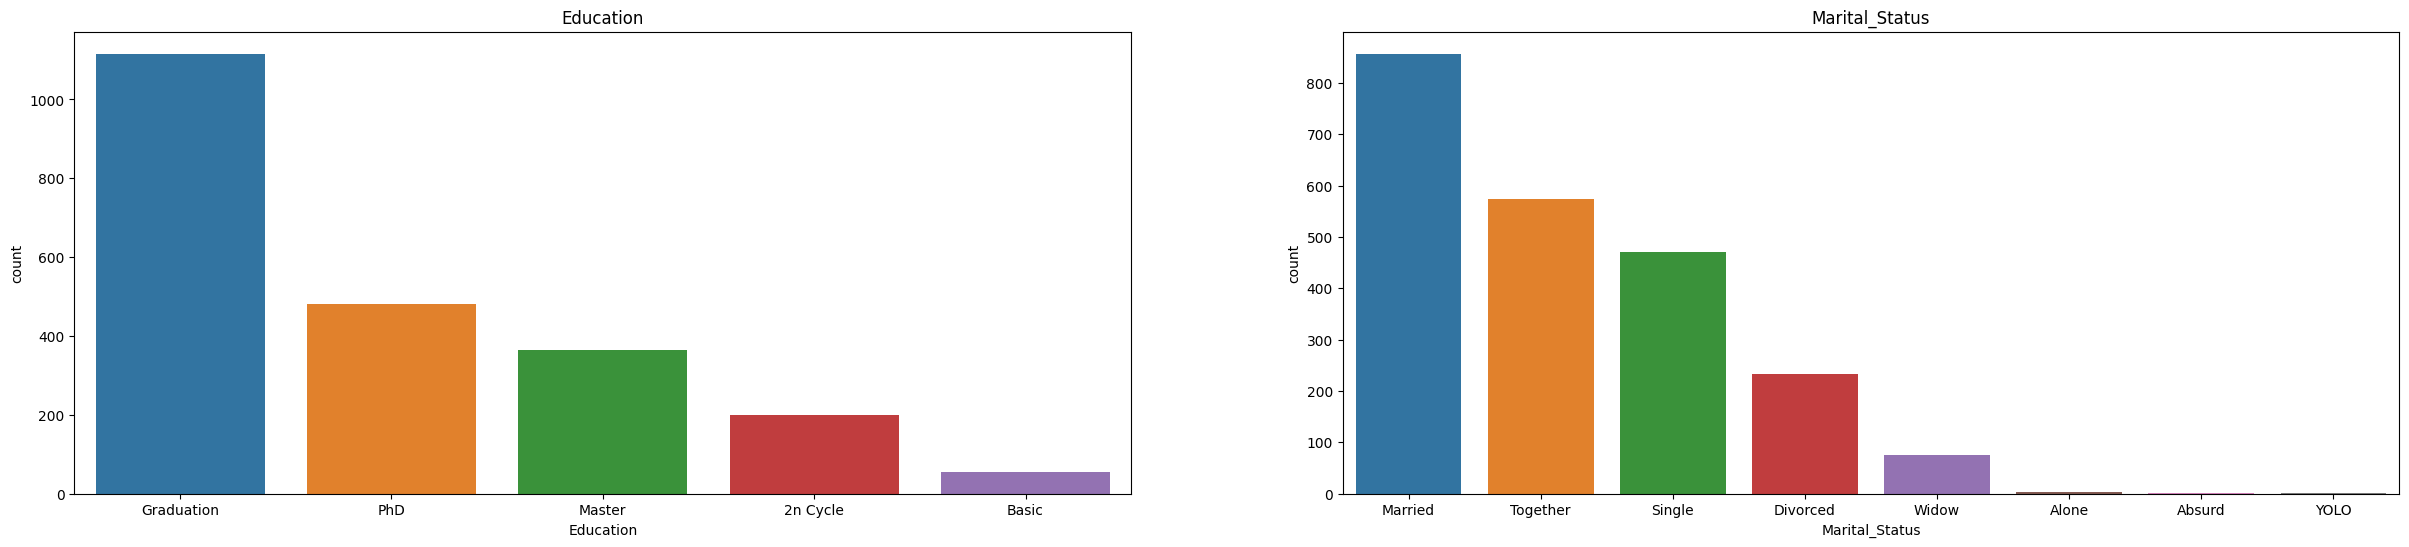

In [350]:
def plot_categories(df, vars):
  '''
    This function creates multiple plots for certain variables

    Args:
        vars (dict, list or list-like): Variable selection,
        e.g. df.select_dtypes('O').

    Returns:
        Plots (fig): Multiple plots containing the selection
  '''
  from math import ceil
  try:
    filas = ceil(vars.shape[1] / 2)
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (30, filas * 6))
    ax = ax.flat


    for i, a in enumerate(vars):
      sns.countplot(x=str(a), data=df, ax=ax[i], order = df[str(a)].value_counts().index).set(title=a)
    plt.show()
  except Exception:
    capture_error()
    return f

# Explore the categorical variables plotting them.
plot_categories(customers, customers.select_dtypes('O'))

## Numerical

In [351]:
def statistics(vars):
  ''' This function prints summary statistics for the subset selected.
  Args:
      vars (list or list-like): A selection of numerical variables.

  Returns:
      stats (DataFrame): A DataFrame containing summary statistics.
  '''
  try:
    stats = vars.describe().T
    stats['median'] = vars.median()
    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]
  except Exception:
    capture_error()
  return(stats)

statistics(customers.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,5458.5,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,1970.0,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,51381.5,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.0,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.0,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,49.0,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,174.5,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,8.0,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,68.0,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,12.0,54.752082,0.0,3.00,12.0,50.00,259.0


# Feature Engineering
A new variable that indicates how many days a customer has been in the dataset might help the model understand clustering better.

In [352]:
dates = []
for i in customers['Dt_Customer']:
    i = i.date()
    dates.append(i)

days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
customers['Customer_For'] = days
customers['Customer_For'] = pd.to_numeric(customers['Customer_For'], errors='coerce')

In [353]:
# Get the Age of each customer
customers['Age'] = 2023 - customers['Year_Birth']

# Get how much each customer has spent in total
customers['Spent'] = customers['MntWines'] + customers['MntFruits'] + \
                      customers['MntMeatProducts'] + customers['MntFishProducts'] + \
                       customers['MntSweetProducts'] + customers['MntGoldProds']

# Does the customer live alone or with someone else?
customers['Living_With'] = customers['Marital_Status'].replace({'Single':'Alone', 'Together':'Partner', 'Married':'Partner',
                                                            'Divorced':'Alone', 'Widow':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

# How many sons and/or daughters the customer has
customers['Children'] = customers['Kidhome'] + customers['Teenhome']

# How many family members does each customer have?
customers['Family_Size'] = customers['Living_With'].replace({'Alone':1, 'Partner':2}) + customers['Children']

# Indicate whether the customer is a parent or not
customers['Is_Parent'] = np.where(customers['Children'] > 0, 1, 0)

# Simplify the Education feature
customers['Education'] = customers['Education'].replace({'Graduation':'Graduate', 'PhD':'Postgraduate',
                                                         'Master':'Postgraduate', 'Basic':'Undergraduate',
                                                         '2n Cycle':'Undergraduate'})

# Rename columns that have long names
customers = customers.rename(columns = {'MntWines':'Wines', 'MntFruits':'Fruits',
                              'MntMeatProducts':'Meat', 'MntFishProducts':'Fish',
                              'MntSweetProducts':'Sweets', 'MntGoldProds':'Gold'})

Now that I have engineered some features, I will drop some columns that are redundant.

In [354]:
customers = customers.drop(columns=['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'])

In [355]:
customers.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


* Income: There is an max at $666,666 (outlier), drop it.

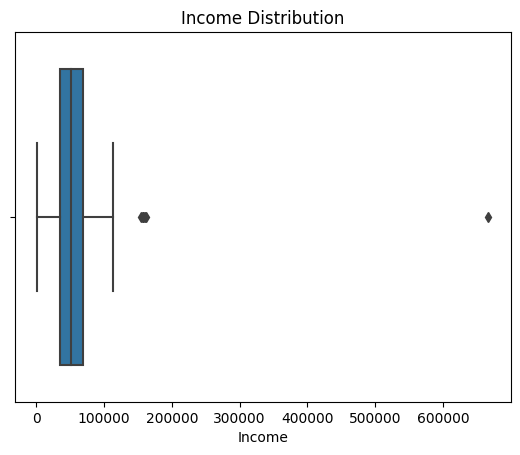

In [356]:
sns.boxplot(data=customers, x='Income').set(title='Income Distribution')
plt.show()

* Age: People in our dataset must have incredible genes, because there is a 130 year old in it. Drop this too.

In [357]:
# Drop the outliers
customers = customers[customers['Income'] < 666666]
customers = customers[customers['Age'] < 130]

<ipython-input-358-c3278d106dff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customers.corr(), annot=True, center=0)


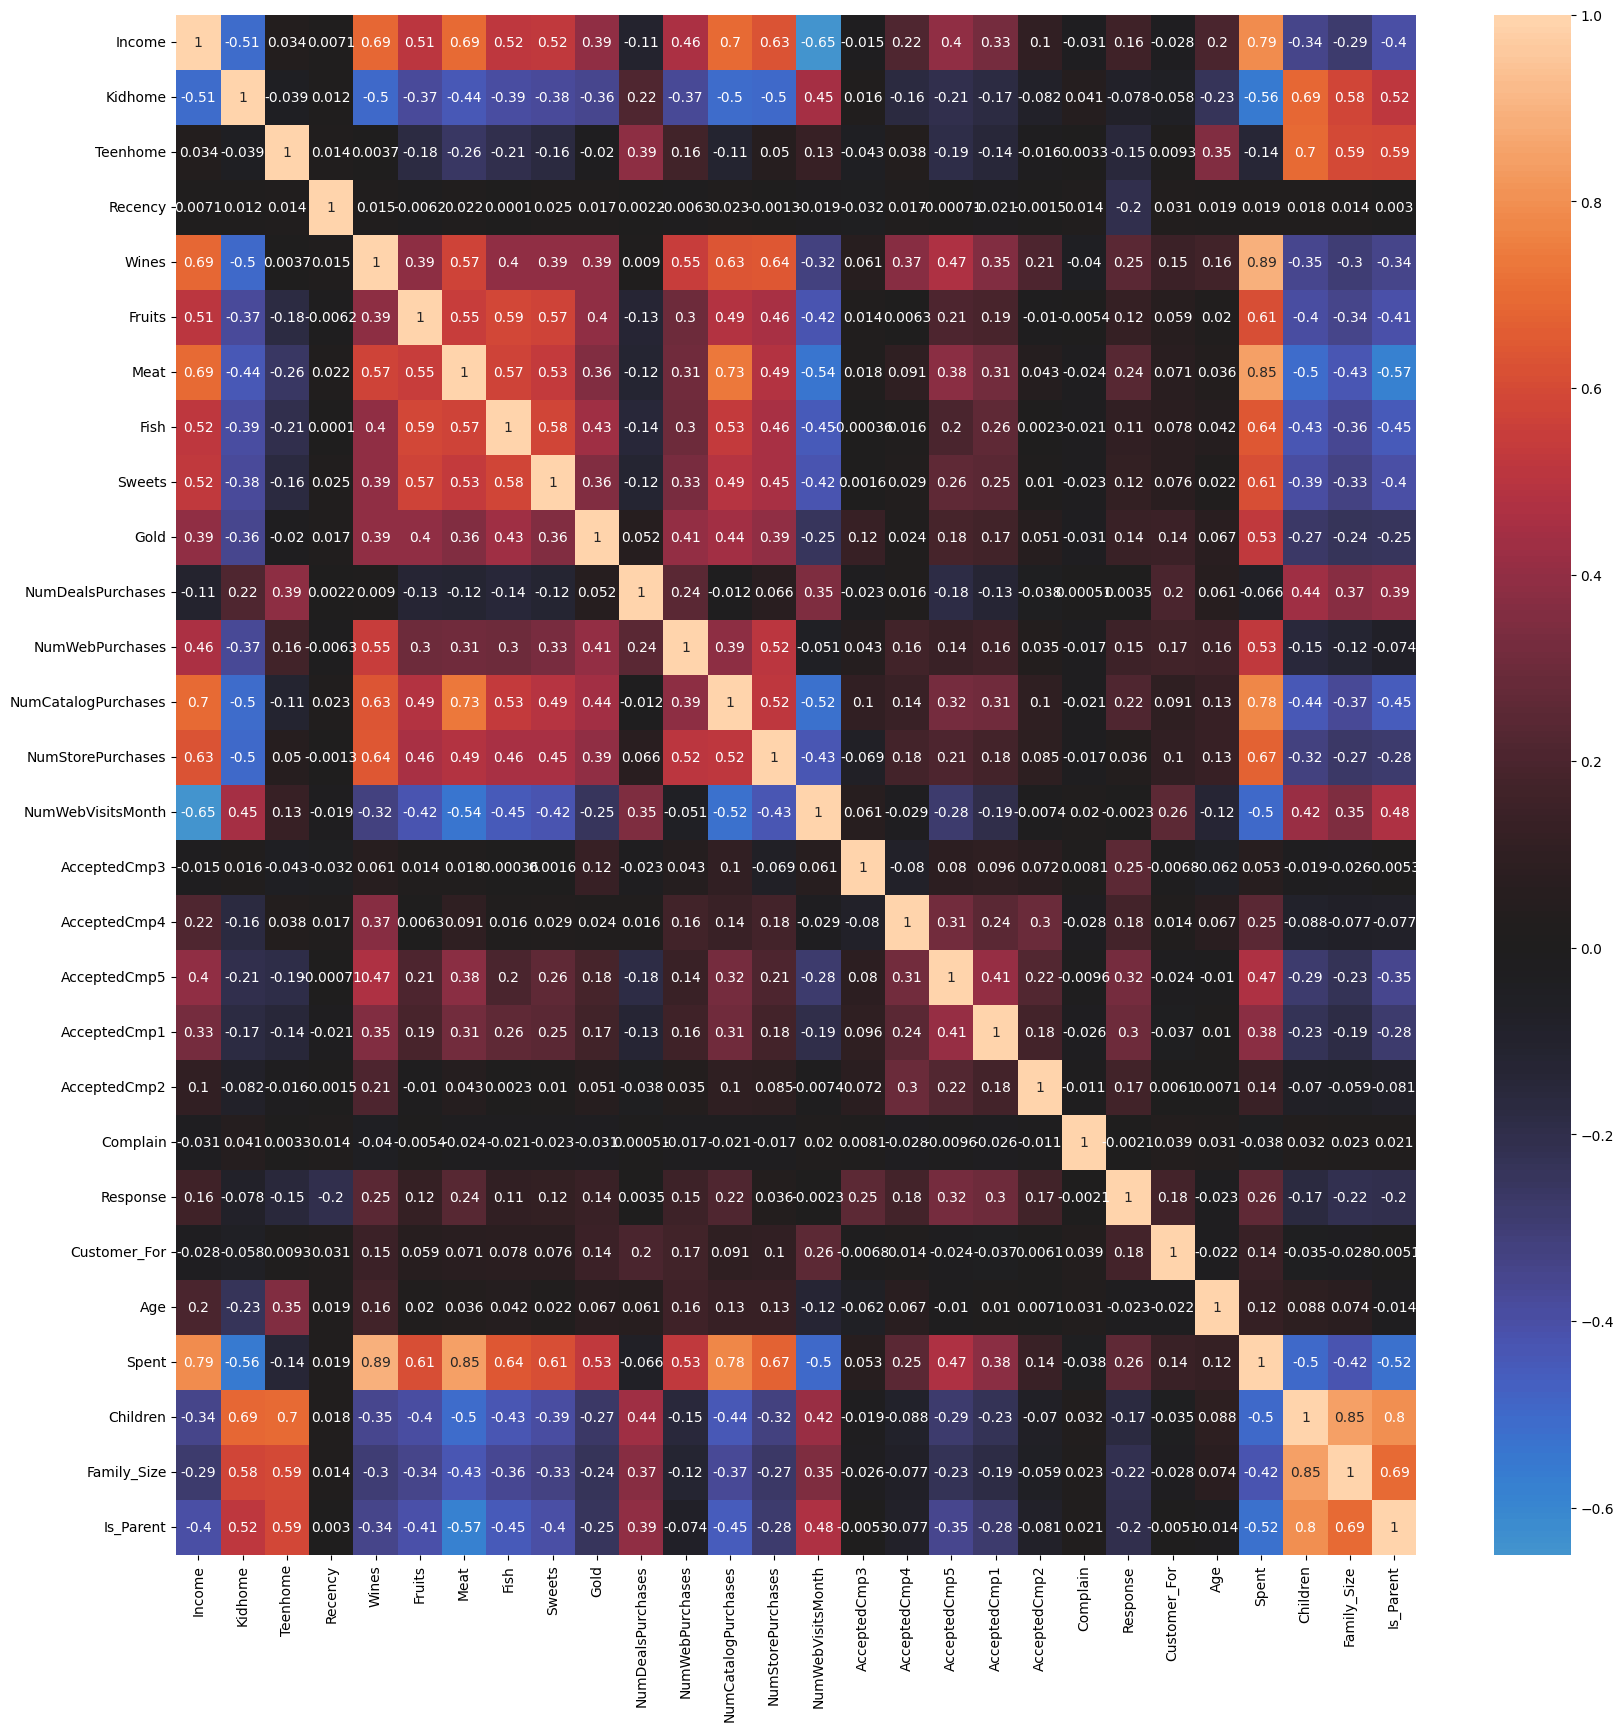

In [358]:
# Now let's take a look at how features correlate
plt.figure(figsize=(20,20))
sns.heatmap(customers.corr(), annot=True, center=0)
plt.show()

# Data preprocessing
* We dont need labeled data in clustering problems, but we need to turn them into numerical.

In [359]:
# Turning categorical variables into numerical
s = (customers.dtypes == 'object')
object_cols = list(s[s].index)
LE = LabelEncoder()
for i in object_cols:
    customers[i] = customers[[i]].apply(LE.fit_transform)

* **Scaling:** Sometimes, data is in different scales, one feature could be money, another one could be time, temperature, and so on. To ensure precision, we want everything on the same scale.   

In [360]:
# Copy original Dataframe
customers_copy = customers.copy()

# Drop
customers_copy = customers_copy.drop(['AcceptedCmp3', 'AcceptedCmp4',
                                      'AcceptedCmp5', 'AcceptedCmp1',
                                      'AcceptedCmp2', 'Complain', 'Response'], axis=1)
# Scale
scaler = StandardScaler()
scaler.fit(customers_copy)
scaled_customers = pd.DataFrame(scaler.transform(customers_copy),columns= customers_copy.columns)

# First rows of the
scaled_customers.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.894265,0.286721,-0.822897,-0.928916,0.309693,0.977332,1.548478,1.689205,2.453299,1.483853,...,2.503567,-0.555074,0.692859,1.974675,0.997709,1.674551,-1.349215,-1.264172,-1.758221,-1.580389
1,-0.894265,-0.261184,1.039980,0.908993,-0.381288,-0.872729,-0.637557,-0.718445,-0.651330,-0.634297,...,-0.571644,-1.170465,-0.131645,-1.665520,1.250273,-0.963153,-1.349215,1.405238,0.449778,0.632755
2,-0.894265,0.912720,-0.822897,-0.928916,-0.795877,0.357680,0.568531,-0.178953,1.339285,-0.147366,...,-0.229954,1.291097,-0.543897,-0.172438,0.324204,0.279388,0.741172,-1.264172,-0.654222,-1.580389
3,-0.894265,-1.176280,1.039980,-0.928916,-0.795877,-0.872729,-0.562176,-0.656024,-0.505230,-0.585604,...,-0.913334,-0.555074,0.280607,-1.923690,-1.275370,-0.920021,0.741172,0.070533,0.449778,0.632755
4,0.570160,0.293922,1.039980,-0.928916,1.553461,-0.392425,0.417770,-0.219080,0.152221,-0.001287,...,0.111736,0.060316,-0.131645,-0.822165,-1.022806,-0.307875,0.741172,0.070533,0.449778,0.632755


## Dimensionality Reduction

**PCA:** Principal Component Analysis is to reduce dimensionality, increasing interpretability reducing information loss. We can reduce all the variables to a determined number of these.

In [361]:
pca = PCA(n_components=3)
pca.fit(scaled_customers)
PCA_customers = pd.DataFrame(pca.transform(scaled_customers), columns=(["col1","col2", "col3"]))
PCA_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2214.0,-1.219540e-16,2.879111,-5.969721,-2.538801,-0.780974,2.389454,7.441333
col2,2214.0,6.418634e-18,1.705086,-4.308016,-1.325440,-0.161885,1.235689,6.138706
col3,2214.0,-2.326755e-17,1.221390,-3.549258,-0.830380,-0.029257,0.812004,6.616351


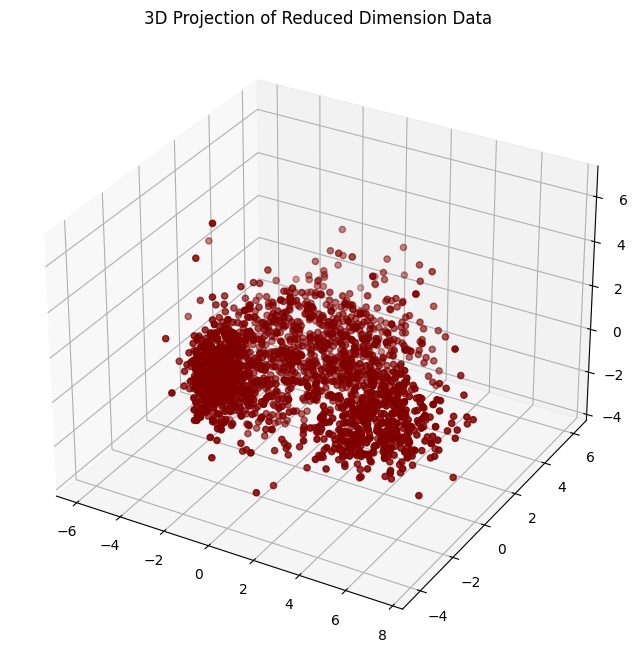

In [362]:
# Set x, y and z
x = PCA_customers['col1']
y = PCA_customers['col2']
z = PCA_customers['col3']

# Plottting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='maroon', marker='o' )
ax.set_title('3D Projection of Reduced Dimension Data')
plt.show()

# Clustering
First I will use the elbow method to know how many clusters to form, and then, I will create the clusters using Agglomerative Clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

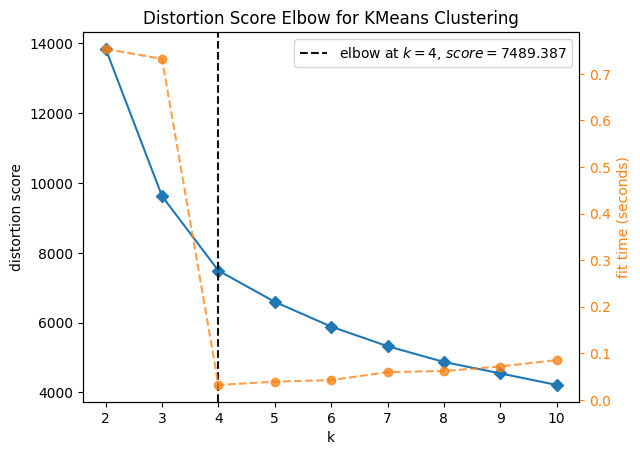

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [363]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_customers)
Elbow_M.show()

The Elbow Method shows that we should use 4 clusters.

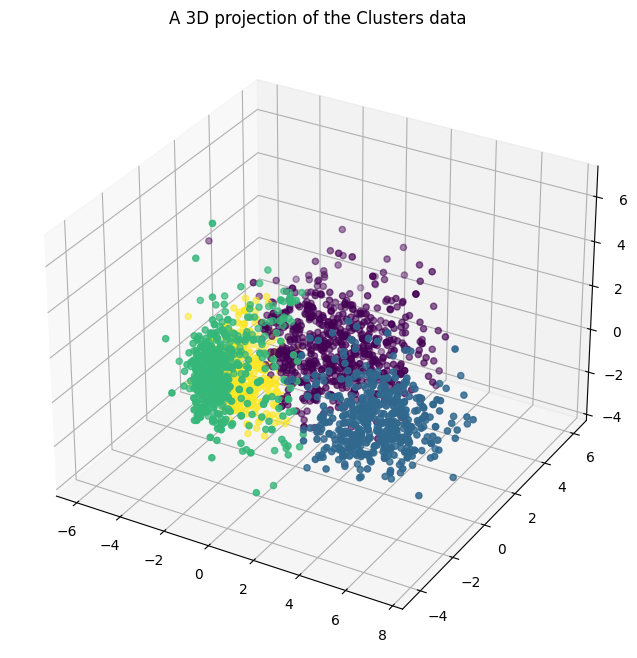

In [364]:
# Initialize
AC = AgglomerativeClustering(n_clusters=4)

# Fit
y_pred = AC.fit_predict(PCA_customers)
PCA_customers['Clusters'] = y_pred

# Add clusters to original dataframe
customers['Clusters']= y_pred

# Let's take a look at the clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=customers['Clusters'], marker='o' )
ax.set_title('A 3D projection of the Clusters data')
plt.show()

# Evaluation
In here I will show key insights obtained by the clustering, such as patterns our customers have. Now, let's take a look at the distribution of the clusters in the dataset.

## Cluster Distribution

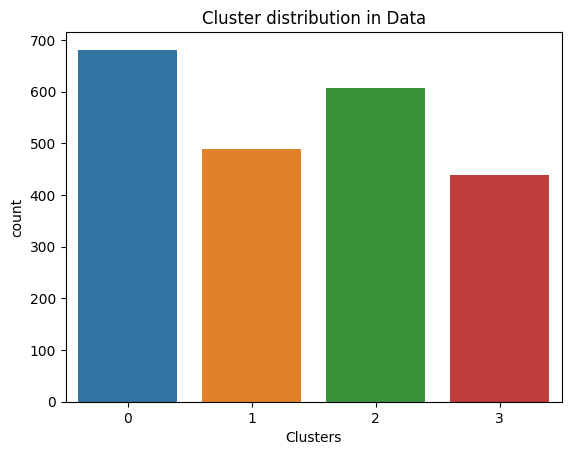

In [365]:
# Plot the distribution of the clusters in the dataset
sns.countplot(data=customers, x='Clusters').set(title='Cluster distribution in Data')
plt.show()

## Spending
Now we want to know much each cluster spends on groceries depending on their income level.

Observe that:
* Cluster 0: Average Income, High Spending.
* Cluster 1: High Income, High Spending.
* Cluster 2: Low Income, Low Spending.
* Cluster 3: High Income, Low Spending.


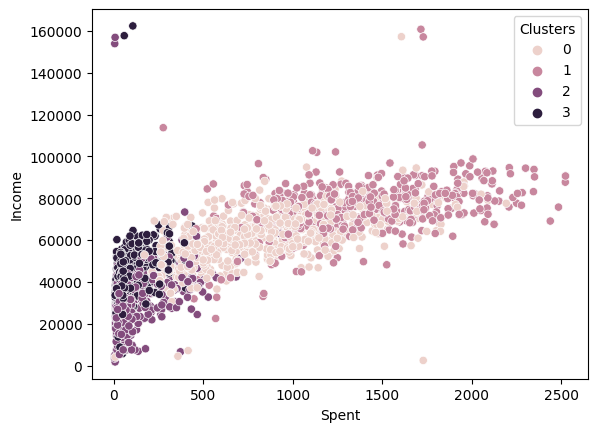

In [366]:
# Income vs Spending by clusters
sns.scatterplot(data=customers, x='Spent', y='Income', hue='Clusters')
plt.show()

We can see in the next figure that the biggest group is cluster 1, which spends more than cluster 0 and the rest of the groups.

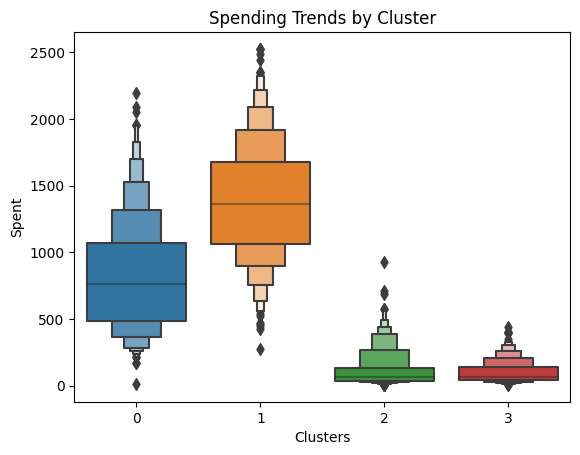

In [367]:
# Explore each cluster's spending behaviors.
sns.boxenplot(data=customers, x='Clusters', y='Spent').set(title='Spending Trends by Cluster')
plt.show()

## Promotions
**Have the marketing campaigns worked?**

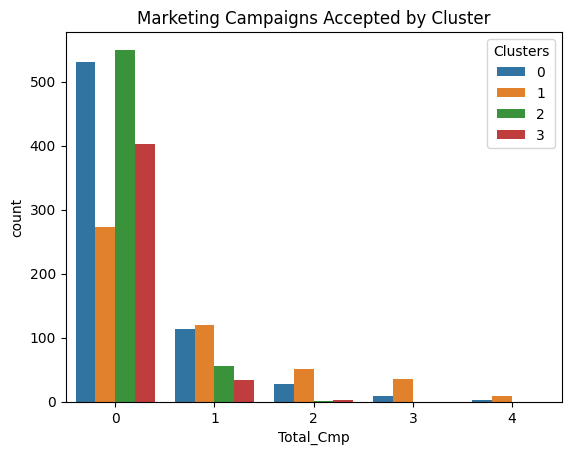

In [368]:
# Total marketing campaigns that lead to a purchase
customers['Total_Cmp'] = customers['AcceptedCmp1'] + customers['AcceptedCmp2'] + \
                         customers['AcceptedCmp3'] + customers['AcceptedCmp4'] + \
                         customers['AcceptedCmp5']

sns.countplot(data=customers, x='Total_Cmp', hue='Clusters') \
            .set(title='Marketing Campaigns Accepted by Cluster')
plt.show()

**Number of Deals Purchased by each Cluster**

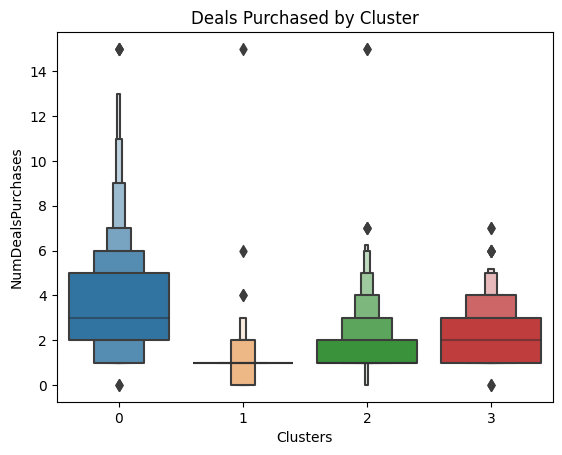

In [369]:
sns.boxenplot(data=customers, y='NumDealsPurchases', x='Clusters') \
            .set(title='Deals Purchased by Cluster')
plt.show()

**Number of Web Purchased by each Cluster**

It seems like cluster 0 and 1 are more prone to buy online. Custers 2 and 3 seem to have other preferences.

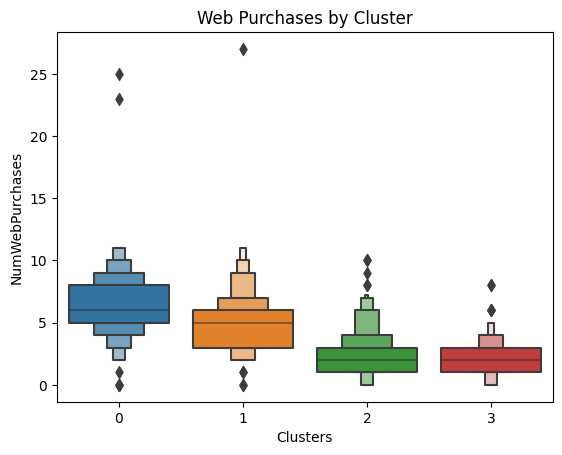

In [370]:
sns.boxenplot(data=customers, y='NumWebPurchases', x='Clusters') \
            .set(title='Web Purchases by Cluster')
plt.show()

**Catalog Purchases by each Cluster**

Group 1 is the cluster that purchases more through a catalog, followed by cluster 0.

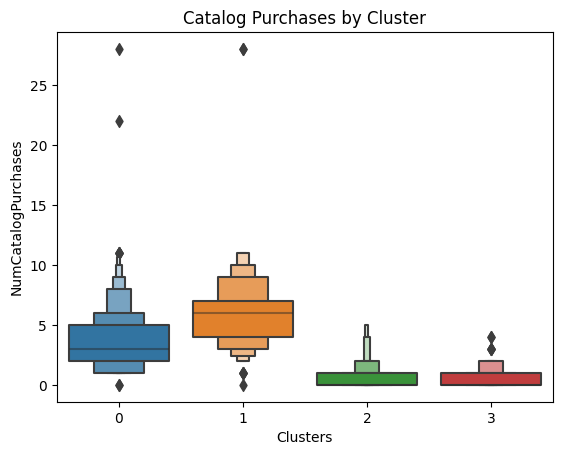

In [371]:
sns.boxenplot(data=customers, y='NumCatalogPurchases', x='Clusters') \
            .set(title='Catalog Purchases by Cluster')
plt.show()

**Store Purchases by each Cluster**

Again, cluster 1 spends more than the rest of the groups, followed by cluster 0.

Its no suprise the behavior of clusters 2 and 3, since they have low spending anyway.

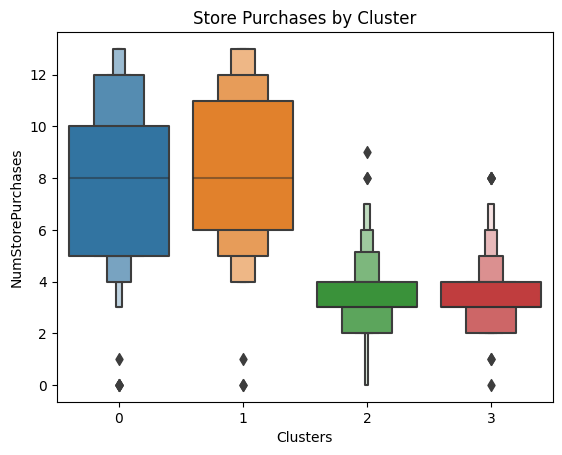

In [372]:
sns.boxenplot(data=customers, y='NumStorePurchases', x='Clusters') \
            .set(title='Store Purchases by Cluster')
plt.show()

## Profiles
The Clustering showed that there is 4 clusters, now let's create a profile for each and one of these, please remember that:

* Cluster 0: Average Income, High Spending.
* Cluster 1: High Income, High Spending.
* Cluster 2: Low Income, Low Spending.
* Cluster 3: High Income, Low Spending.

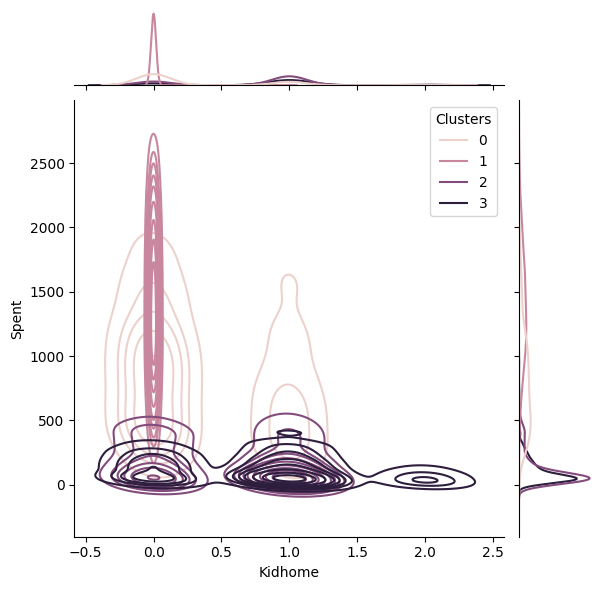

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


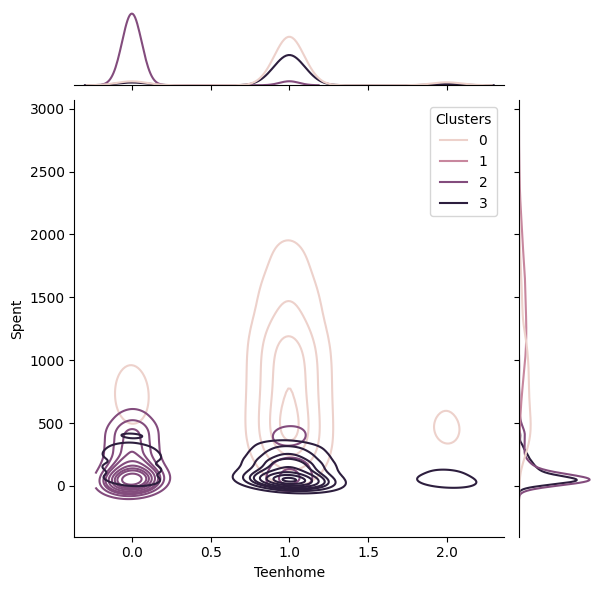

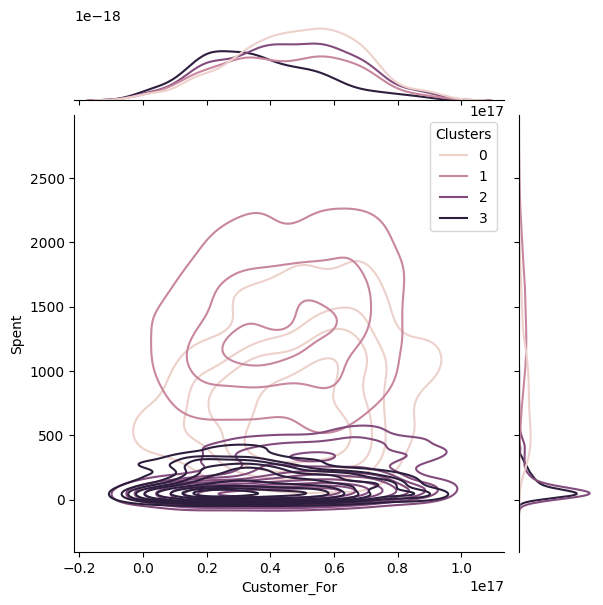

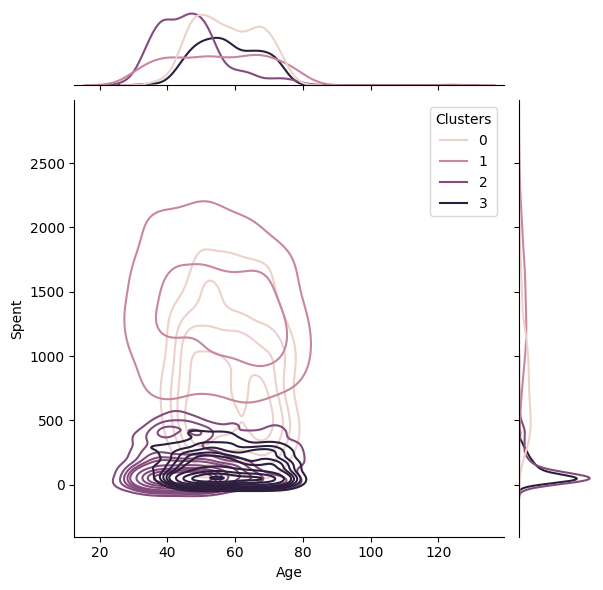

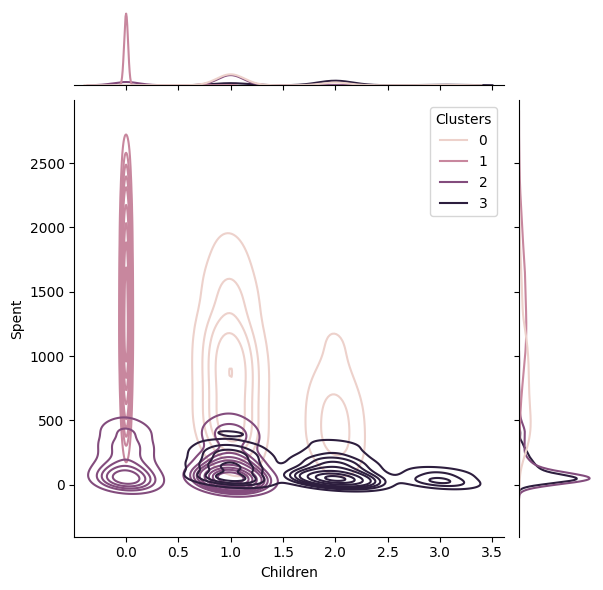

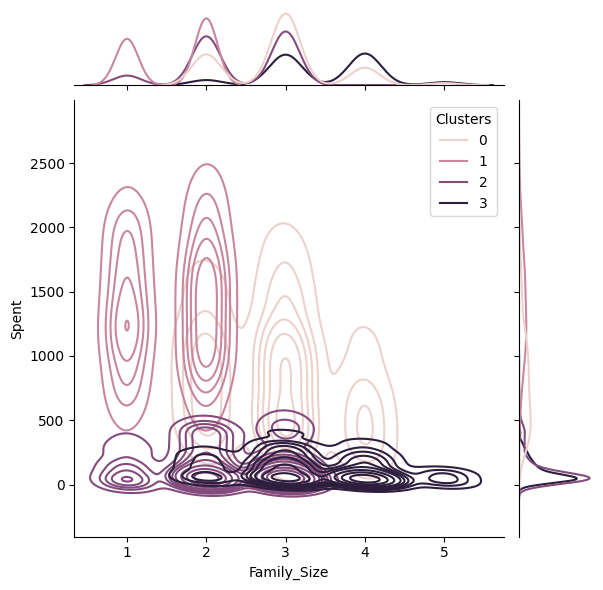

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


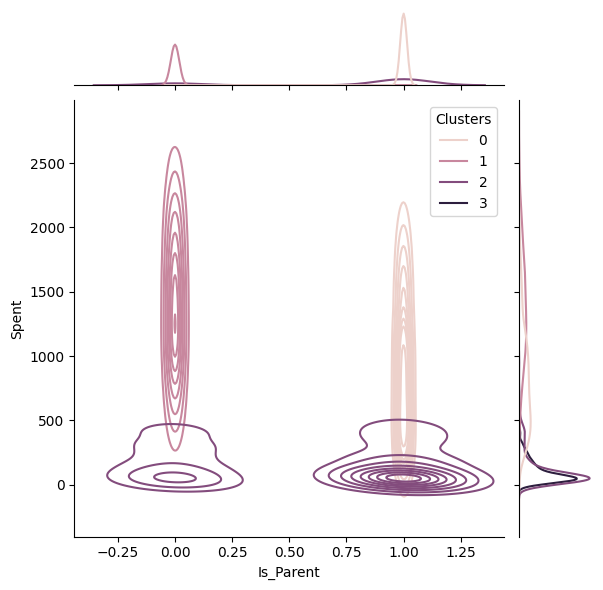

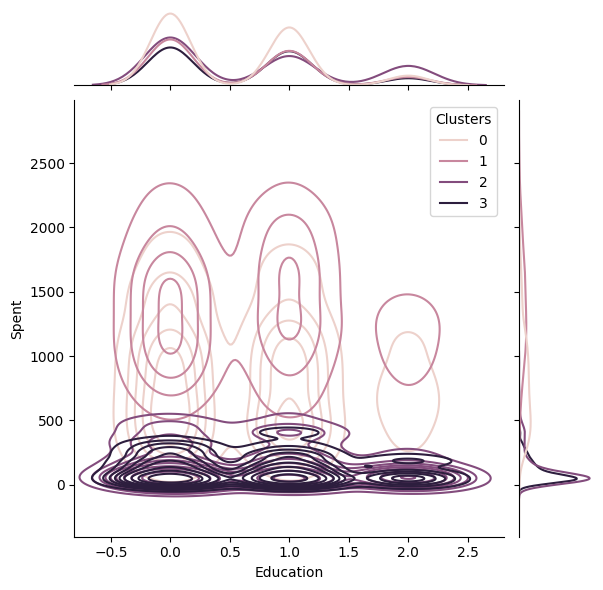

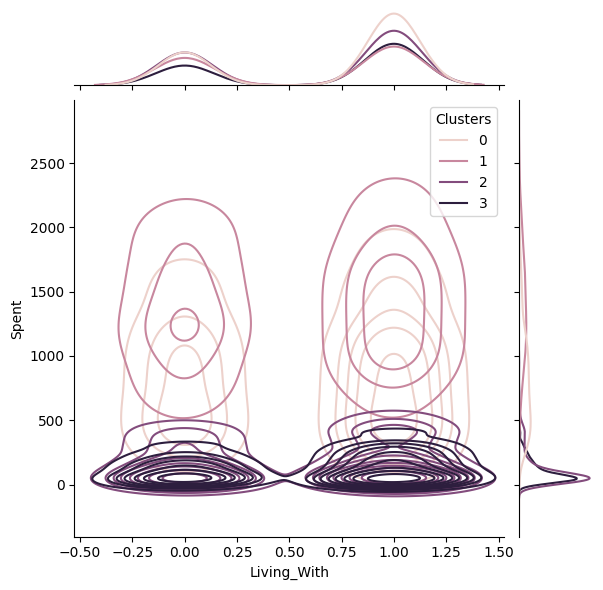

In [409]:
profiles = ['Kidhome', 'Teenhome', 'Customer_For', 'Age', 'Children',
            'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for profile in profiles:
  sns.jointplot(data=customers, x=profile, y='Spent', hue='Clusters', kind='kde')
  plt.show()

# Key Insights

**The information obtained from the clustering and the evaluation is best summarized in the next points:**

* Cluster 0: Average Income, High Spending.
  * Old
  * Parent
  * 2-4 family members
  * Could be single parents
  * Could have a teenager

* Cluster 1: High Income, High Spending.
  * All ages
  * Does not have kids
  * Single or a couple (mostly are single)

* Cluster 2: Low Income, Low Spending.
  * Young
  * Most of them have 1 kid (no teens in most cases)
  * 3 members max in the family
  * Most of them are parents

* Cluster 3: Low Income, High Spending.
  * Old
  * Parents
  * Most families have a teen
  * 2-5 family members
  * Low income